In [1]:
import pandas as pd
import numpy as np

# Loading training array and labels

In [2]:
import pickle
with open('trainingdata_array','rb') as f:
    train_array = pickle.load(f)

In [3]:
import pickle
with open('labels_array','rb') as f:
    cat = pickle.load(f)

In [4]:
train_array.shape

(113351, 28, 28, 1)

In [5]:
from tensorflow import keras
m=keras.models.load_model('model_handwritten')

In [6]:
m.predict_classes(train_array)

C:\Users\KUNAL MEHTA\anaconda3\envs\datascience\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([11, 11, 11, ..., 14, 14, 14], dtype=int64)

In [7]:
loss, accuracy=m.evaluate(train_array, cat, verbose=0)

In [8]:
print(f"loss:{loss}\n accuracy:{accuracy}")

loss:0.051097847521305084
 accuracy:0.9822497963905334


In [9]:
path=r'C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images'

In [10]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img=cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        print(os.path.join(folder,filename))
        img=~img
        if img is not None:
            _,thresh= cv2.threshold(img,127,255, cv2.THRESH_BINARY)
            ctrs,_=cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr:cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h, maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    h_max=h
                    w_max=w
            im_crop=thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize=cv2.resize(im_crop, (28,28))
            im_resize=np.reshape(im_resize, (28,28,1))
            train_data.append(im_resize)
    return train_data

In [11]:
import cv2
import os
train_data=np.array(load_images_from_folder(path))

C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\+.PNG
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\+_10.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\+_20.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\+_24.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\+_34.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\+_43.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\,_1327.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\,_584.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\,_624.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\,_626.jpg
C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\final_project\Contours_CNN\images\,_985.jpg
C:\Users\KUNAL MEHTA\OneDrive

In [12]:
train_data.shape

(28, 28, 28, 1)

In [13]:
m.predict_classes(train_data)

array([11, 11, 11, 11, 11, 11,  7,  4,  4,  4,  0, 16, 16, 16, 16, 16, 15,
       15, 15, 15, 15,  4, 15, 16,  4, 15, 15, 15], dtype=int64)

'div':'10'
'+':'11'
'-':"12"
'mul':'13'
'^':'14'
'log':"15"
'=':'16'

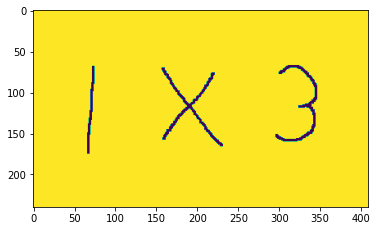

rects [[66, 68, 9, 107], [157, 70, 75, 96], [296, 67, 51, 93]]
bools [[0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [77]:
import matplotlib.pyplot as plt
import cv2
img=cv2.imread(r"C:\Users\KUNAL MEHTA\OneDrive\Desktop\python\Handwrittenequationsolver\images\1mul3.PNG", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()


img=~img
_,thresh=cv2.threshold(img,127,255, cv2.THRESH_BINARY)
ctrs,_=cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt=sorted(ctrs,key=lambda ctr:cv2.boundingRect(ctr)[0])
w=int(28)
h=int(28)
train_data=[]
rects=[]
for c in cnt:
    x,y,w,h= cv2.boundingRect(c)
    rect=[x,y,w,h]
    rects.append(rect)
print("rects", rects)
bool_rect=[]
for r in rects:
    l=[]
    for rec in rects:
        flag=0
        if rec!=r:
            if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                flag=1
            l.append(flag)
        if rec==r:
            l.append(0)
    bool_rect.append(l)
print("bools", bool_rect)


    

dump_rects []
final_rects [[66, 68, 9, 107], [157, 70, 75, 96], [296, 67, 51, 93]]


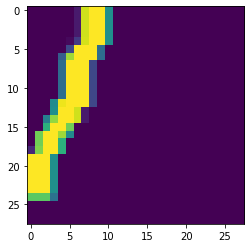

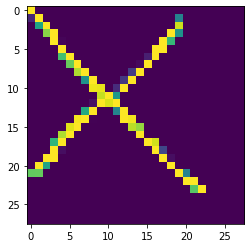

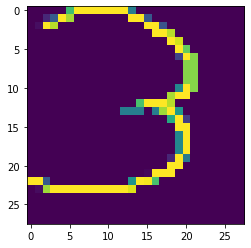

In [78]:
dump_rect=[]
for i in range(0, len(cnt)):
    for j in range(0, len(cnt)):
        if bool_rect[i][j]==1:
            area1=rects[i][2]*rects[i][3]
            area2=rects[j][2]*rects[j][3]
            if(area1==min(area1, area2)):
                dump_rect.append(rects[i])
print("dump_rects", dump_rect)
final_rects=[i for i in rects if i not in dump_rect]
print("final_rects", final_rects)
for r in final_rects:
    x=r[0]
    y=r[1]
    w=r[2]
    h=r[3]
    im_crop=thresh[y:y+h+15, x:x+w+15]
    im_resize=cv2.resize(im_crop,(28,28))
    train_data.append(im_resize)
    plt.imshow(im_resize)
    plt.show()

In [79]:
s=""
for i in range(len(train_data)):
    train_data[i]-np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=m.predict_classes(train_data[i])
    if(result[0]==10):
        s=s+"/"
    if(result[0]==11):
        s=s+"+"
    if(result[0]==12):
        s=s+"-"
    if(result[0]==13):
        s=s+"*"
    if(result[0]==14):
        s=s+"**"
    if(result[0]==15):
        s=s+"log"
    if(result[0]==16):
        s=s+"="
        
    if(result[0]==1):
        s=s+"1"
    if(result[0]==2):
        s=s+"2"
    if(result[0]==3):
        s=s+"3"
    if(result[0]==4):
        s=s+"4"
    if(result[0]==5):
        s=s+"5"
    if(result[0]==6):
        s=s+"6"
    if(result[0]==7):
        s=s+"7"
    if(result[0]==8):
        s=s+"8"
    if(result[0]==9):
        s=s+"9"
    if(result[0]==0):
        s=s+"0"
print(s)

1*3


In [80]:
eval(s)

3